# **Data visualisation**

## Objectives

*   Answer business requirement 1: 
    * The client is interested to have a study to visually differentiate a healthy leaf and an infected leaf

## Inputs

* output/test
* output/train
* output/val

## Outputs

* Average image size
* Mean and variability of images per label plot
* Plot to distinguish contrast between healthy and infected leaves
* Generate code that answers business requirement 1 and can be used to build image montage on Streamlit dashboard



---

# Set input directories

Set train validation and test paths

In [2]:
data_dir = "/workspace/Mildew-detection-project/output/"
train_path = "/workspace/Mildew-detection-project/output/train"
test_path = "test"
val_path = "val"

# Set output directory

In [3]:
work_dir = os.getcwd()
work_dir

version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

---

# Define and save image shape

In [4]:
image_shape = (100, 100, 3)
image_shape

(100, 100, 3)

In [5]:
!{sys.executable} -m pip install joblib
import joblib

joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


['outputs/v1/image_shape.pkl']

# Visualisation of image data

## Average and variability of images per label

### Function to load images in an array (tensor)

In [6]:
!{sys.executable} -m pip install tensorflow
;


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


''

---

In [7]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(data_dir, new_size=(50,50), n_images_per_label = 20):
  
  X, y = np.array([], dtype='int'), np.array([], dtype='object')
  labels = os.listdir(data_dir)

  for label in labels:
    counter = 0
    for image_filename in os.listdir(data_dir + '/' + label):
      # n_images_per_label: we set a limit, since it may take too much time
      if counter < n_images_per_label:
        
        img = image.load_img(data_dir + '/' + label + '/' + image_filename, target_size=new_size)
        if image.img_to_array(img).max() > 1: 
          img_resized = image.img_to_array(img) / 255
        else: 
          img_resized = image.img_to_array(img)
        
        X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
        y = np.append(y, label)
        counter += 1

  return X, y;

2022-12-31 11:20:54.031921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-31 11:20:54.244971: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-31 11:20:54.245004: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-31 11:20:54.282281: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-31 11:20:55.311509: W tensorflow/stream_executor/platform/de

### Set label names

In [8]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are',labels);

Label for the images are ['healthy', 'powdery_mildew']


### Load image shape and labels in array

In [9]:
!{sys.executable} -m pip install numpy
import numpy as np


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [10]:
X, y = load_image_as_array(data_dir=train_path,
                           new_size=image_shape,
                          n_images_per_label = 30)
print(X.shape, y.shape)

(60, 100, 100, 3) (60,)


### Plot and save mean and variability of images per label

In [11]:
def plot_mean_variability_per_labels(X, y, figsize=(12,5), save_image=False):
  """
   The pseudo code for the function is:
  * Loop in all labels
  * Subset an array for given label
  * Calculate mean and standard deviation
  * Create a figure displaying mean and variability of images
  * Save image

  """

  for label_to_display in np.unique(y):
    sns.set_style("white")

    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    arr = X[boolean_mask]

    avg_img = np.mean(arr, axis = 0)
    std_img = np.std(arr, axis = 0)
    print(f"==== Label {label_to_display} ====")
    print(f"Image Shape: {avg_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label_to_display}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Variability image for label {label_to_display}")
    axes[1].imshow(std_img, cmap='gray')

    if save_image:
      plt.savefig(f"{file_path}/avg_var_{label_to_display}.png", bbox_inches='tight', dpi=150)
    else:
      plt.tight_layout()
      plt.show()
      print("\n")

In [12]:
!{sys.executable} -m pip install seaborn;
!{sys.executable} -m pip install matplotlib;

from matplotlib import pyplot as plt;
import seaborn as sns;


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


==== Label healthy ====
Image Shape: (100, 100, 3)
==== Label powdery_mildew ====
Image Shape: (100, 100, 3)


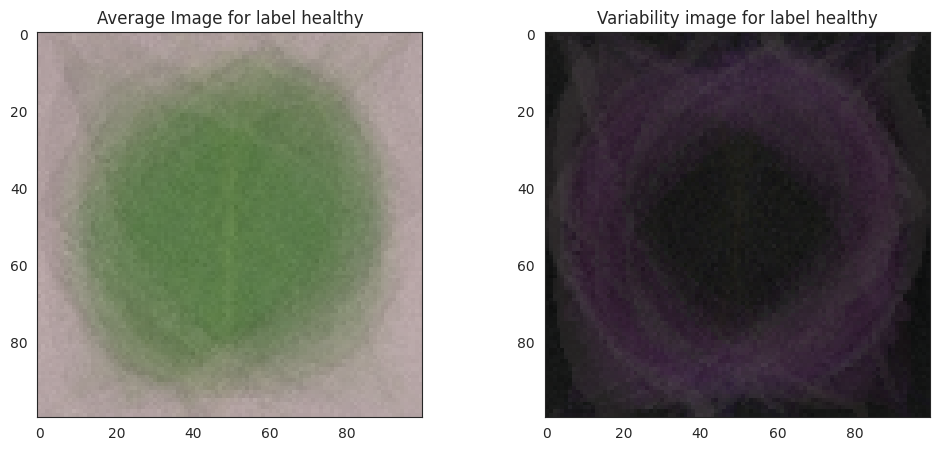

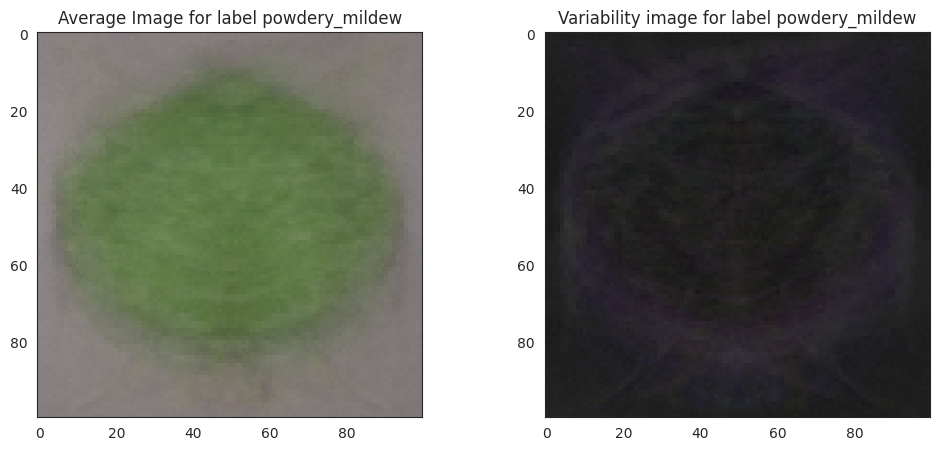

In [13]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12,5),save_image=True)

## Difference between average parasite-contained and average uninfected cell images

In [14]:
def subset_image_label(X,y,label_to_display):
  y = y.reshape(-1,1,1)
  boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
  df = X[boolean_mask]
  return df


def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20,5), save_image=False):
  sns.set_style("white")

  if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
    print(f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
    return

  # calculate mean from label1
  images_label = subset_image_label(X, y, label_1)
  label1_avg = np.mean(images_label, axis = 0)

  # calculate mean from label2
  images_label = subset_image_label(X, y, label_2)
  label2_avg = np.mean(images_label, axis = 0)

  # calculate difference and plot difference, avg label1 and avg label2
  difference_mean = label1_avg - label2_avg
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
  axes[0].imshow(label1_avg, cmap='gray')
  axes[0].set_title(f'Average {label_1}')
  axes[1].imshow(label2_avg, cmap='gray')
  axes[1].set_title(f'Average {label_2}')
  axes[2].imshow(difference_mean, cmap='gray')
  axes[2].set_title(f'Difference image: Avg {label_1} & {label_2}')
  if save_image:
    plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
  else:
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


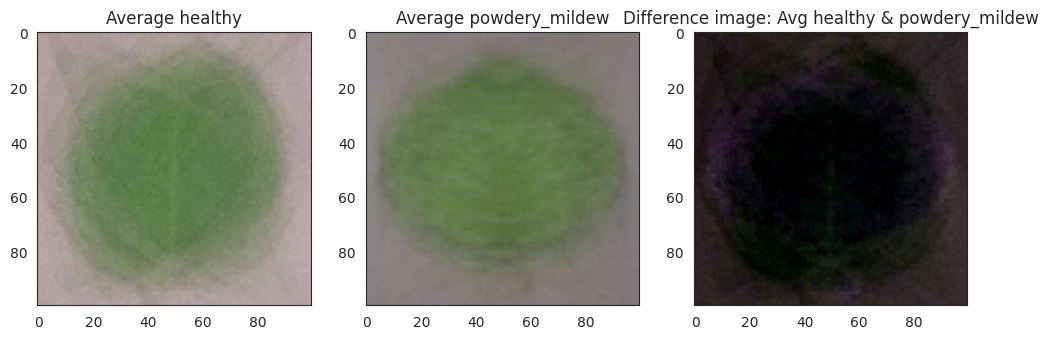

In [15]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='healthy', label_2='powdery_mildew',
                                        figsize=(12,10),
                                        save_image=True
                                        )

## Image Montage

In [16]:
import itertools
import random
sns.set_style("white")

# logic
# if label exists in the folder
  # check if your montage space is greater tha nsubset size
  # create list of axes indices based on nrows and ncols
  # create a Figure and display images
    # in this loop, load and plot given image


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15,10)):
  

  labels = os.listdir(dir_path)

  # subset the class you are interested to display
  if label_to_display in labels:

    # checks if your montage space is greater than subset size
    images_list = os.listdir(dir_path+'/'+ label_to_display)
    if nrows * ncols < len(images_list):
      img_idx = random.sample(images_list, nrows * ncols)
    else:
      print(
          f"Decrease nrows or ncols to create your montage. \n"
          f"There are {len(images_list)} in your subset. "
          f"You requested a montage with {nrows * ncols} spaces")
      return
    

    # create list of axes indices based on nrows and ncols
    list_rows= range(0,nrows)
    list_cols= range(0,ncols)
    plot_idx = list(itertools.product(list_rows,list_cols))


    # create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
    for x in range(0,nrows*ncols):
      img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
      img_shape = img.shape
      axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
      axes[plot_idx[x][0], plot_idx[x][1]].set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
      axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
      axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
    plt.tight_layout()
    plt.show()


  else:
    print("The label you selected doesn't exist.")
    print(f"The existing options are: {labels}")

Run Montage in all labels

In [17]:
!{sys.executable} -m pip install scikit-image
from skimage.io import imread


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


healthy


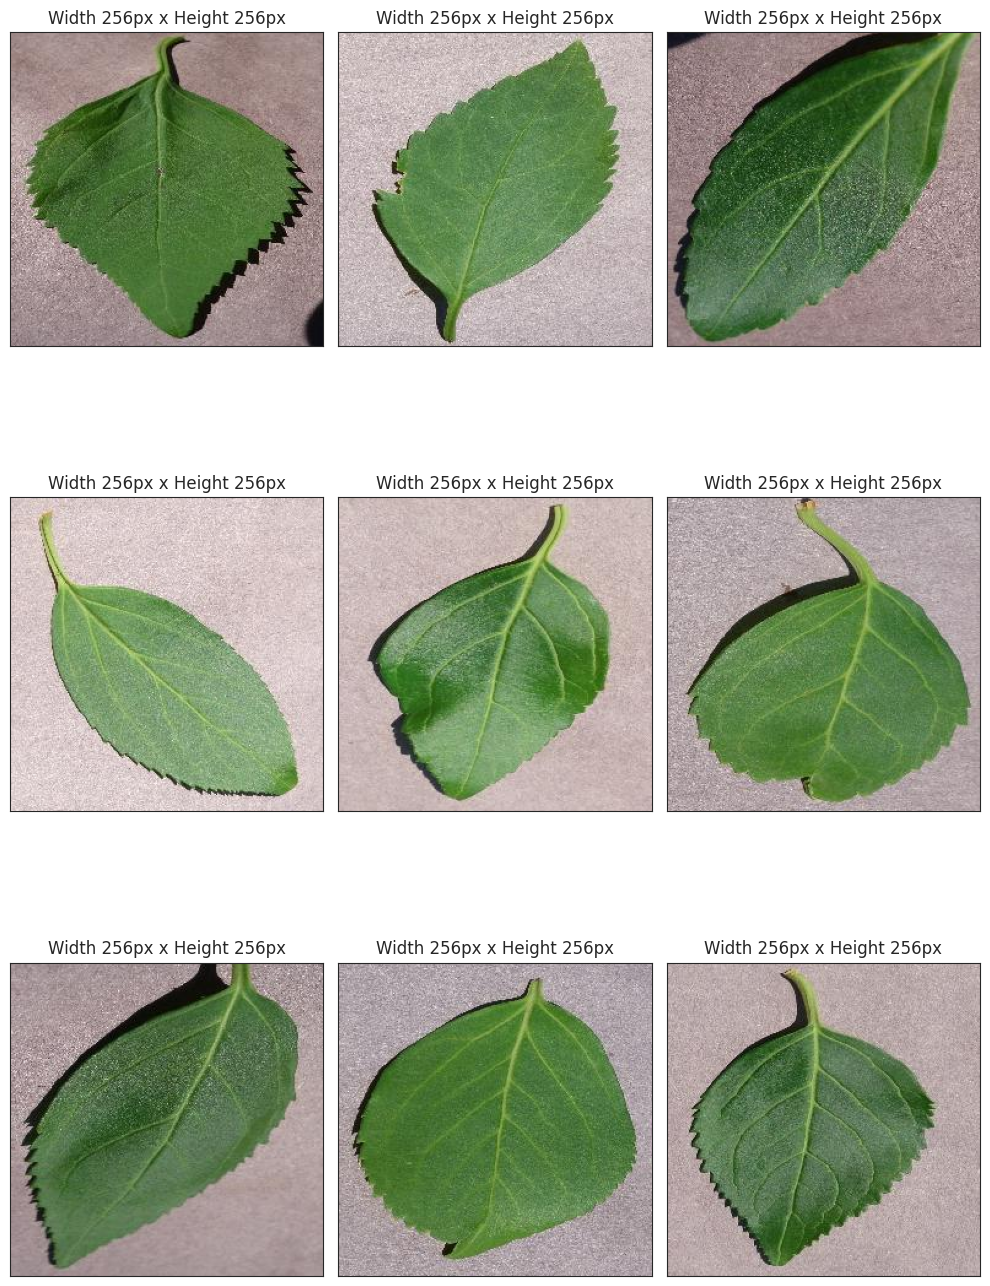



powdery_mildew


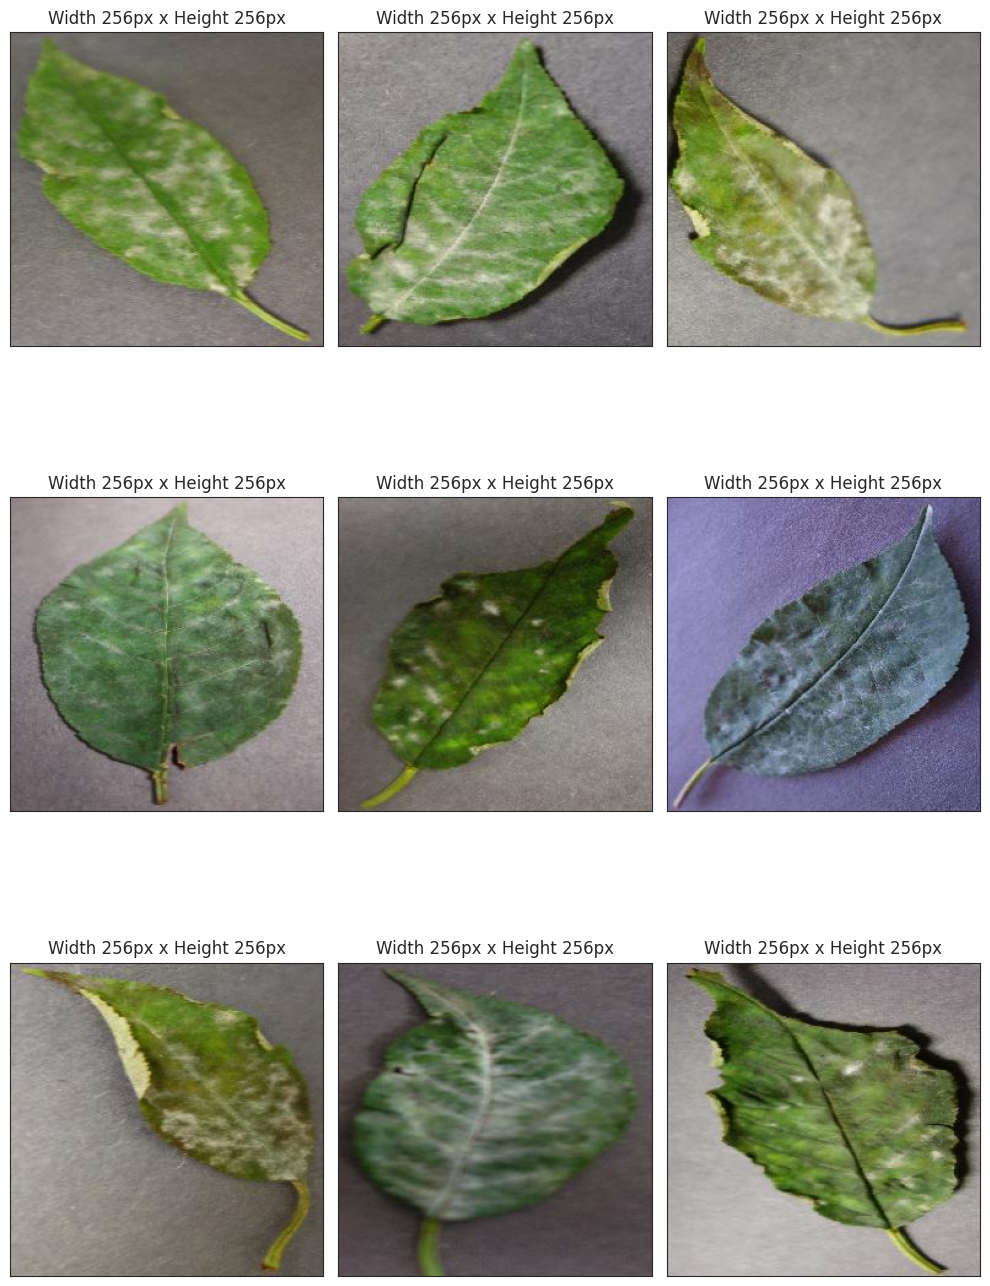

In [18]:
for label in labels:
  print(label)
  image_montage(dir_path= train_path,
                label_to_display= label,
                nrows=3, ncols=3,
                figsize=(10,15)
                )
  print("\n")

# Distribution of data

In [19]:
data_dir = "/workspace/Mildew-detection-project/output/"
my_data_dir = '/workspace/Mildew-detection-project/model_input'
train_path = "/workspace/Mildew-detection-project/output/train"
test_path = "test"
val_path = "val"

In [20]:
for filename in os.listdir('/workspace/Mildew-detection-project/model_input'): #get directory name, store name in a list and print the name
    files=[]                                                               
    files.append(filename)
    print(files)
    for file in files: #print the number of elements in the directory that was just printed
        element_path = '/healthy'
        element_path2 = '/powdery_mildew'
        DIR = my_data_dir + '/' + file + element_path
        DIR2 = my_data_dir + '/' + file + element_path2
        No_of_files = len(os.listdir(DIR)) + len(os.listdir(DIR2))
        print(No_of_files)

['test']
844
['train']
2944
['val']
420


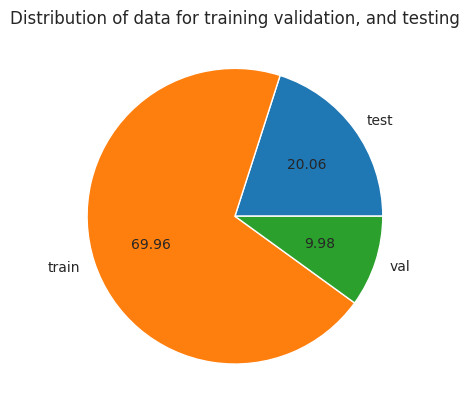

In [21]:
import matplotlib.pyplot as plt

labels = ['test', 'train', 'val']
sizes = [844, 2944, 420]
# Plot
plt.pie(sizes, labels=labels, 
        autopct='%.2f')
plt.title('Distribution of data for training validation, and testing')

plt.show()

## Amount of healthy files

In [22]:
for filename in os.listdir('/workspace/Mildew-detection-project/model_input'): #get directory name, store name in a list and print the name
    files=[]                                                               
    files.append(filename)
    print(files)
    for file in files: #print the number of elements in the directory that was just printed
        element_path = '/healthy'
        DIR = my_data_dir + '/' + file + element_path
        No_of_healthy_files = len(os.listdir(DIR))
        print(No_of_healthy_files)

['test']
422
['train']
1472
['val']
210


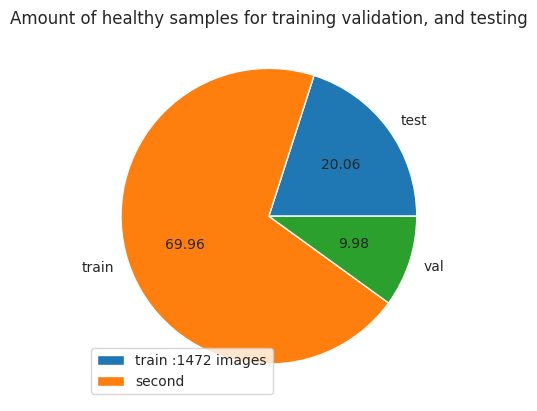

In [23]:
labels = ['test', 'train', 'val']
sizes = [422, 1472, 210]
# Plot
plt.pie(sizes, labels=labels, 
        autopct='%.2f')
plt.title('Amount of healthy samples for training validation, and testing')
plt.legend(['train :1472 images', 'second'])

plt.show()

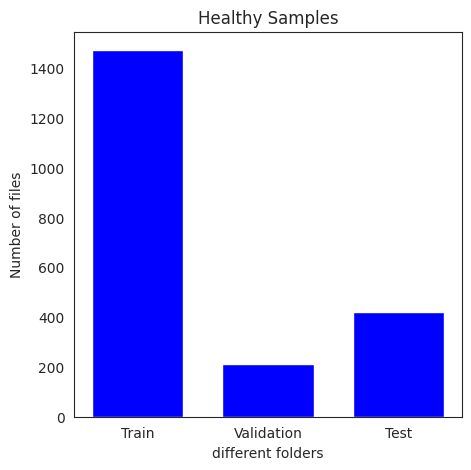

In [24]:
data = {'Train':1472, 'Validation':210, 'Test':422,} 
courses = list(data.keys()) 
values = list(data.values()) 
   

fig = plt.figure(figsize = (5, 5)) 

plt.bar(courses, values, color ='blue',  
        width = 0.7) 
  
plt.xlabel("different folders") 
plt.ylabel("Number of files") 
plt.title("Healthy Samples") 
plt.show() 

In [25]:
for filename in os.listdir('/workspace/Mildew-detection-project/model_input'): #get directory name, store name in a list and print the name
    files=[]                                                               
    files.append(filename)
    print(files)
    for file in files: #print the number of elements in the directory that was just printed
        element_path = '/powdery_mildew'
        DIR = my_data_dir + '/' + file + element_path
        No_of_files = len(os.listdir(DIR))
        print(No_of_files)

['test']
422
['train']
1472
['val']
210


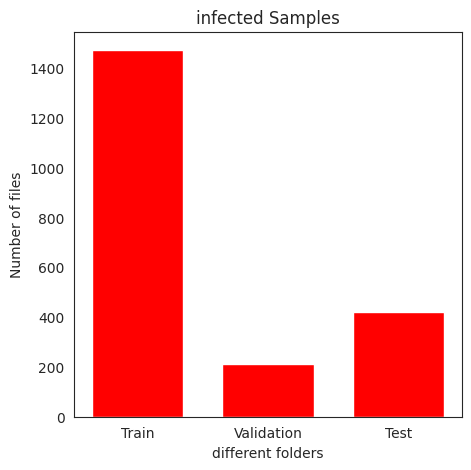

In [26]:
data = {'Train':1472, 'Validation':210, 'Test':422,} 
courses = list(data.keys()) 
values = list(data.values()) 
   

fig = plt.figure(figsize = (5, 5)) 

plt.bar(courses, values, color ='red',  
        width = 0.7) 
  
plt.xlabel("different folders") 
plt.ylabel("Number of files") 
plt.title("infected Samples") 
plt.show() 

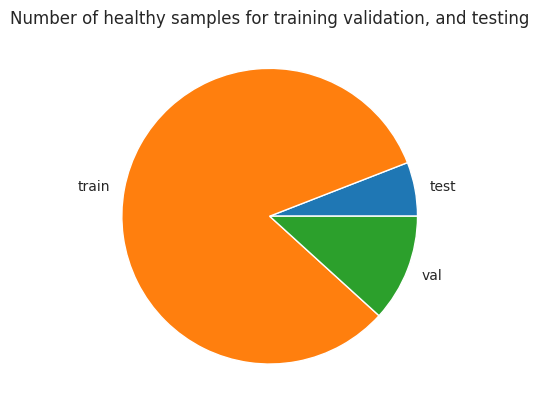

In [27]:
labels = ['test', 'train', 'val']
sizes = [211, 2944, 420]
# Plot
plt.pie(sizes, labels=labels,)
plt.title('Number of healthy samples for training validation, and testing')

plt.show()